Primeros registros del dataset:
   Unnamed: 0         Map       Team  InternalTeamId  MatchId  RoundId  \
0         600  de_inferno  Terrorist               1        4        1   
1         601  de_inferno  Terrorist               1        4        1   
2         602  de_inferno  Terrorist               1        4        1   
3         603  de_inferno  Terrorist               1        4        1   
4         604  de_inferno  Terrorist               1        4        1   

  RoundWinner MatchWinner  Survived  AbnormalMatch  ... RoundKills  \
0       False        True     False          False  ...          0   
1       False        True     False          False  ...          0   
2       False        True     False          False  ...          0   
3       False        True     False          False  ...          0   
4       False        True      True          False  ...          0   

  RoundAssists  RoundHeadshots  RoundFlankKills  RoundStartingEquipmentValue  \
0            0        

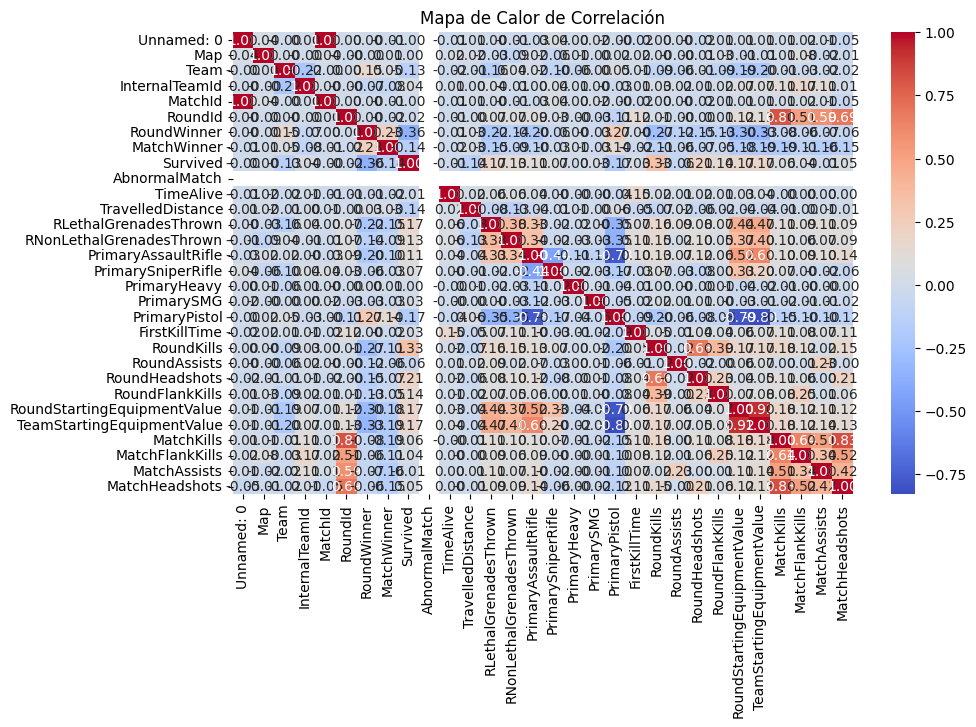

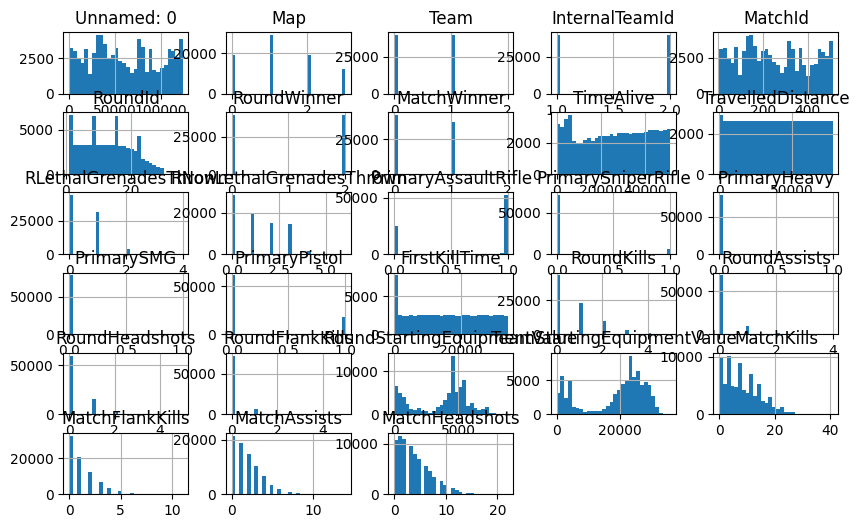

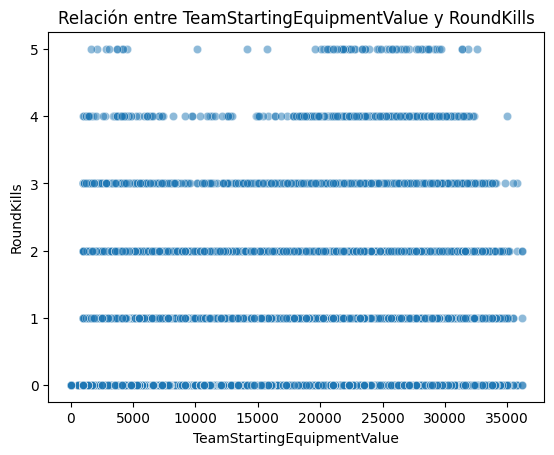

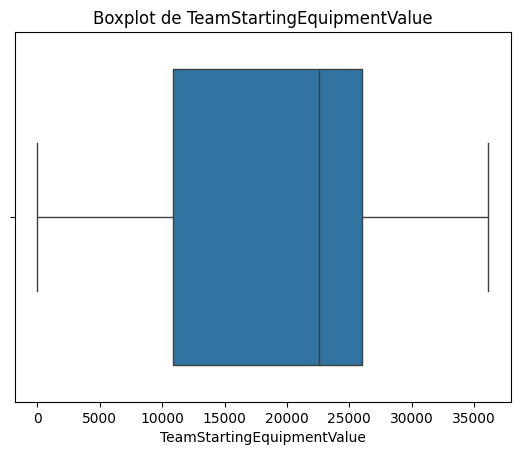

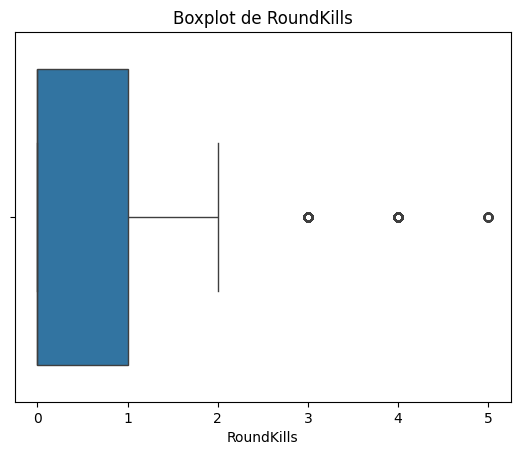

In [ ]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset
df = pd.read_csv("Anexo.csv", sep=";", low_memory=False)

# Mostrar los primeros registros
print("Primeros registros del dataset:")
print(df.head())

# Revisar tipos de datos en el dataset
print("\nTipos de datos:")
print(df.dtypes)

# Convertir columnas categóricas en numéricas usando LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Matriz de correlación (solo variables numéricas)
correlation_matrix = df.corr()
print("\nMatriz de correlación:")
print(correlation_matrix)

# Visualización de matriz de correlación con heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlación")
plt.show()

# Histograma de las variables numéricas
df.hist(figsize=(10, 6), bins=30)
plt.show()

# Gráfico de dispersión entre TeamStartingEquipmentValue y RoundKills
sns.scatterplot(x=df['TeamStartingEquipmentValue'], y=df['RoundKills'], alpha=0.5)
plt.xlabel("TeamStartingEquipmentValue")
plt.ylabel("RoundKills")
plt.title("Relación entre TeamStartingEquipmentValue y RoundKills")
plt.show()

# Boxplots para detectar valores atípicos
sns.boxplot(x=df['TeamStartingEquipmentValue'])
plt.title("Boxplot de TeamStartingEquipmentValue")
plt.show()

sns.boxplot(x=df['RoundKills'])
plt.title("Boxplot de RoundKills")
plt.show()

# Regresión lineal simple

MAE: 0.5287648503765471
MSE: 0.43679668336567995
RMSE: 0.6609059565215614
R²: 0.44728919579182613


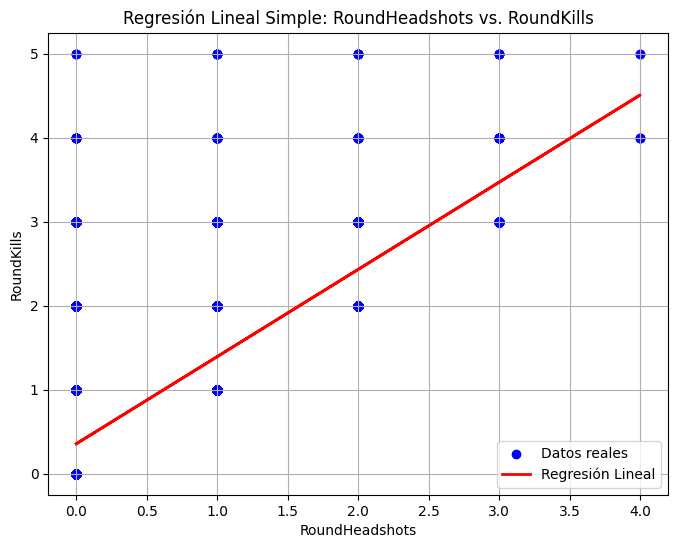

In [ ]:
# Paso 1: Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Paso 2: Cargar el dataset
df = pd.read_csv("Anexo.csv", sep=";", low_memory=False)

# Paso 3: Filtrar solo filas con datos válidos
df = df.dropna(subset=['RoundHeadshots', 'RoundKills'])

# Paso 4: Definir la variable predictora (X) y la objetivo (y)
X = df[['RoundHeadshots']]  # Variable independiente
y = df['RoundKills']  # Variable dependiente

# Paso 5: División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 6: Entrenar el modelo de regresión lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Paso 7: Predicción y evaluación
y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

# Paso 8: Gráfico de regresión lineal simple
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label="Datos reales")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regresión Lineal")
plt.xlabel("RoundHeadshots")
plt.ylabel("RoundKills")
plt.title("Regresión Lineal Simple: RoundHeadshots vs. RoundKills")
plt.legend()
plt.grid(True)
plt.show()

La regresión lineal simple analiza la relación entre RoundHeadshots (disparos a la cabeza) y RoundKills (asesinatos en la ronda). Su objetivo es encontrar una ecuación matemática que describa cómo los headshots influyen en los kills.
Resultados clave:
- R² = 0.447 → El modelo explica un 44.7% de la variabilidad en los kills, lo que indica una relación significativa, pero no perfecta.
- MAE = 0.528 → En promedio, el modelo se equivoca por 0.5 kills.
- Gráfico: La línea roja representa la predicción del modelo; si los puntos azules están cerca de la línea, el modelo es preciso.
Conclusión:
Los headshots impactan los kills, pero otros factores también influyen (armas, estrategia, posición).


# Regresión lineal múltiple

<ipython-input-3-68e39131699c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.to_numeric(X[col], errors='coerce')  # Convertir a float64, reemplazando errores con NaN


MAE: 0.427076026468055
MSE: 0.34145158023161254
RMSE: 0.5843385835554696
R²: 0.5679363312610839


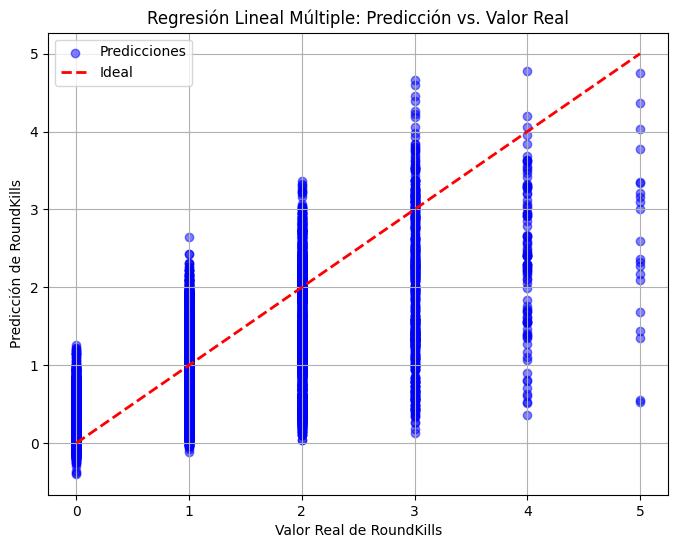

In [ ]:
features = ['RoundAssists', 'RoundHeadshots', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown',
            'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol',
            'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
            'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots']

X = df[features]
y = df['RoundKills']

# Convertir todas las variables a formato numérico
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')  # Convertir a float64, reemplazando errores con NaN

# Paso 10: Manejo de valores NaN
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Paso 11: Normalización
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Paso 12: División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Paso 13: Entrenar el modelo de regresión múltiple
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Paso 14: Predicción y evaluación
y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

# Paso 15: Gráfico de regresión lineal múltiple
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal")
plt.xlabel("Valor Real de RoundKills")
plt.ylabel("Predicción de RoundKills")
plt.title("Regresión Lineal Múltiple: Predicción vs. Valor Real")
plt.legend()
plt.grid(True)
plt.show()

A diferencia de la regresión lineal simple, aquí usamos varias variables predictoras en lugar de solo una. Esto permite capturar mejor la relación entre diferentes factores y RoundKills.
Resultados clave:
- MAE = 0.427 → En promedio, el error en la predicción es de 0.42 kills, lo que mejora respecto a la regresión simple.
- R² = 0.567 → El modelo ahora explica el 56.7% de la variabilidad, lo que indica una mejor precisión en las predicciones.
- RMSE = 0.584 → La dispersión del error es más baja, lo que sugiere un modelo más confiable.
 Conclusión:
La regresión múltiple predice mejor los RoundKills porque usa más información, reduciendo el error y aumentando la precisión.

El gráfico anterior muestra la comparación entre los valores reales de asesinatos por ronda (RoundKills) y los valores predichos por el modelo de regresión lineal múltiple. Cada punto representa una observación del conjunto de prueba.

- La línea roja punteada representa la situación ideal en que las predicciones coinciden exactamente con los valores reales.

- Si los puntos están muy cerca de esa línea, el modelo está haciendo buenas predicciones.

- Si los puntos están muy dispersos, el modelo presenta errores importantes.

Este gráfico permite visualizar el desempeño global del modelo y detectar posibles patrones de error sistemático (por ejemplo, si el modelo tiende a sobreestimar o subestimar en ciertos rangos).